# Import Required Libraries
Import necessary libraries such as numpy, pandas, MinMaxScaler, Sequential, LSTM, Dense, and matplotlib.

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load and Preprocess Data
Load the weather data from a CSV file, convert datetime, set index, fill missing values, and scale the data using MinMaxScaler.

In [3]:
# Load and Preprocess Data
data = pd.read_csv('/kaggle/input/hanoiweather1990-2024-data-from-visual-crossing/hanoiweather.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')
data = data.fillna(data.mean(numeric_only=True))
target_variable = 'temp'
data_to_use = data[[target_variable]].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_to_use)

# Create Sequences for LSTM Model
Define a function to create sequences of data for the LSTM model and generate sequences using the scaled data.

In [5]:
# Create Sequences for LSTM Model
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Set the sequence length
seq_length = 60

# Generate sequences using the scaled data
X, y = create_sequences(scaled_data, seq_length)

# Split Data into Train, Validation, and Test Sets
Split the generated sequences into training, validation, and test sets.

In [6]:
# Define the sizes for training, validation, and test sets
train_size = int(len(X) * 0.8)
val_size = int(len(X) * 0.1)
test_size = len(X) - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

# Build and Train LSTM Model
Build an LSTM model using Sequential, add LSTM and Dense layers, compile the model, and train it using the training and validation data.

In [7]:
# Build and Train LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0703 - val_loss: 0.0073
Epoch 2/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0069 - val_loss: 0.0063
Epoch 3/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0063 - val_loss: 0.0055
Epoch 4/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 5/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 6/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 7/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 8/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 9/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 10/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 11/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 12/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/ste

# Save the Trained Model
Save the trained LSTM model to a file.

In [9]:
# Save the Trained Model
model.save('weather_hanoi.keras')

# Make Predictions and Inverse Transform
Use the trained model to make predictions on the test data and inverse transform the predictions and actual values.

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
RMSE: 1.6105024760125584


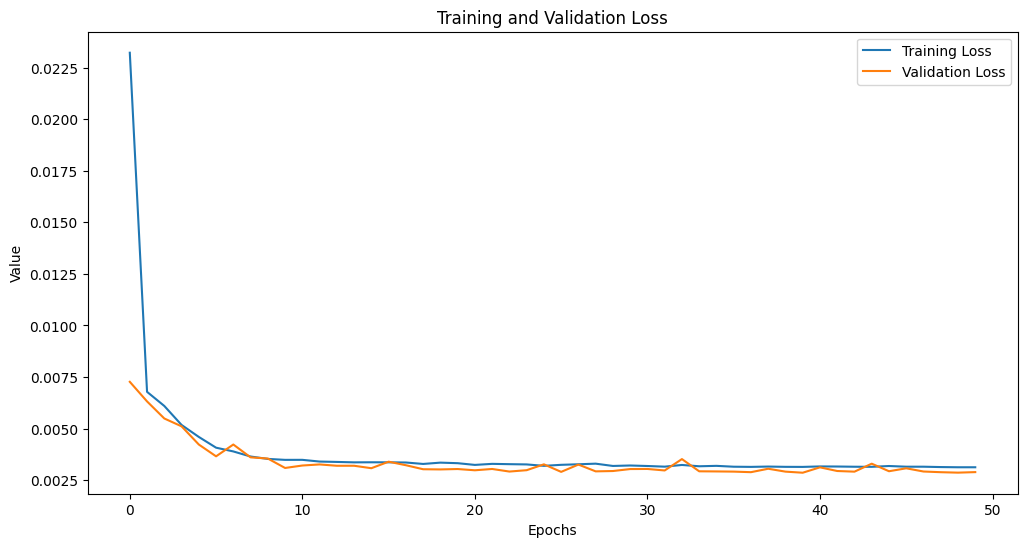

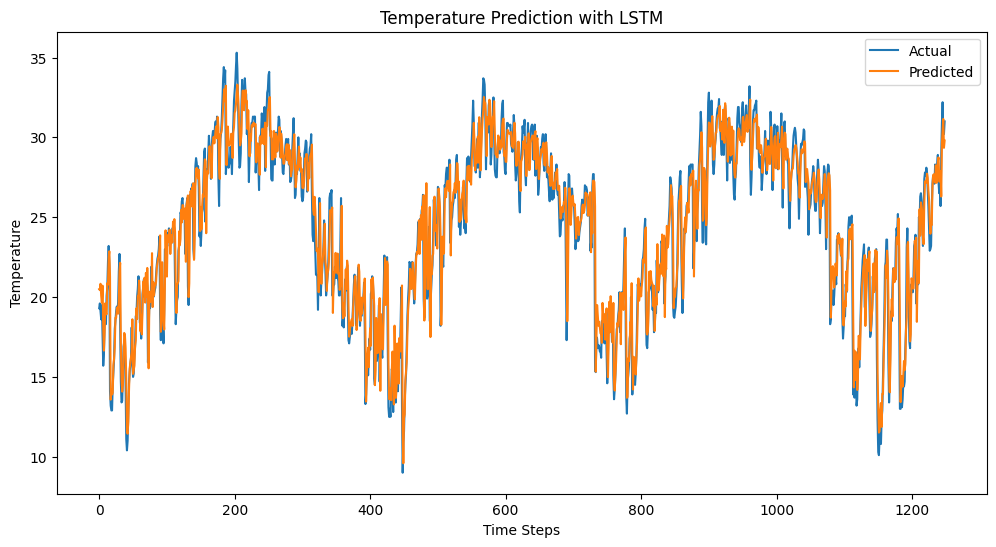

In [10]:
# Make Predictions and Inverse Transform
y_pred = model.predict(X_test)
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

rmse = np.sqrt(np.mean((y_pred_original - y_test_original)**2))
print(f"RMSE: {rmse}")

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred_original, label='Predicted')
plt.legend()
plt.title('Temperature Prediction with LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Temperature')
plt.show()

# Evaluate Model Performance
Calculate the RMSE to evaluate the model's performance.

In [11]:
# Evaluate Model Performance
rmse = np.sqrt(np.mean((y_pred_original - y_test_original)**2))
print(f"RMSE: {rmse}")

RMSE: 1.6105024760125584


# Visualize Training and Validation Loss
Plot the training and validation loss over epochs.

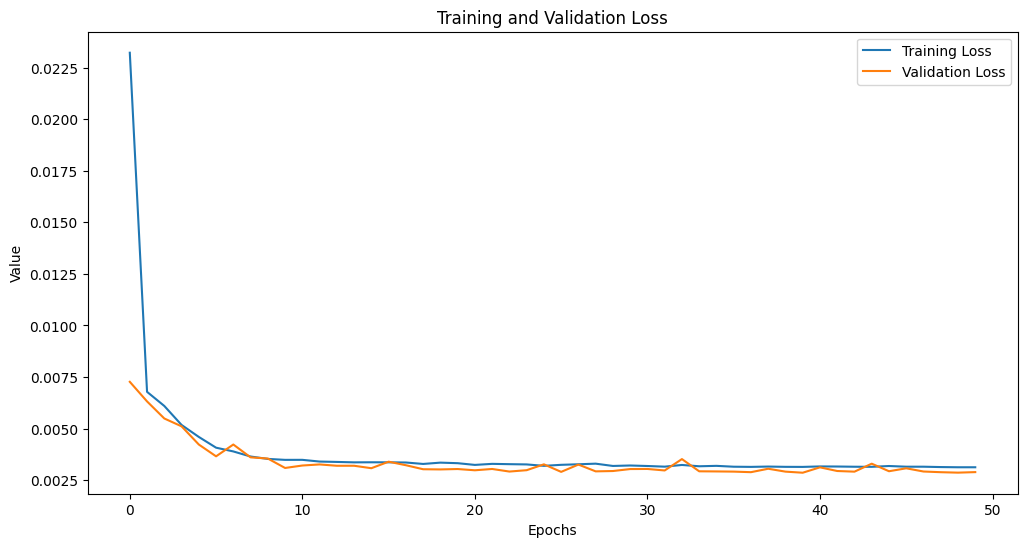

In [12]:
# Visualize the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot Actual vs Predicted Temperature
Plot the actual vs predicted temperature values.

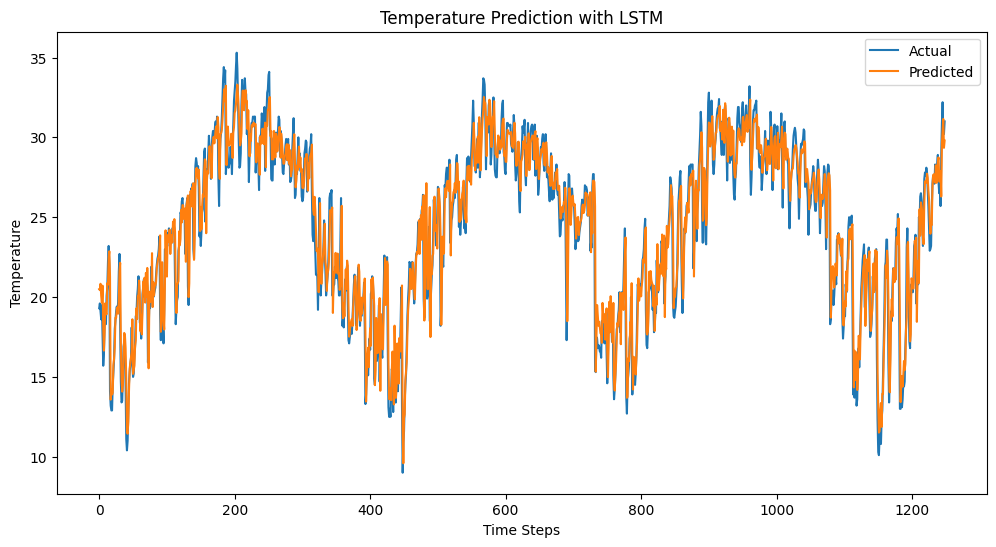

In [13]:
# Plot the actual vs predicted temperature
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred_original, label='Predicted')
plt.legend()
plt.title('Temperature Prediction with LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Temperature')
plt.show()

# Predict 7-Day Temperature
Use the trained model to predict the temperature for the next 7 days and plot the predictions.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


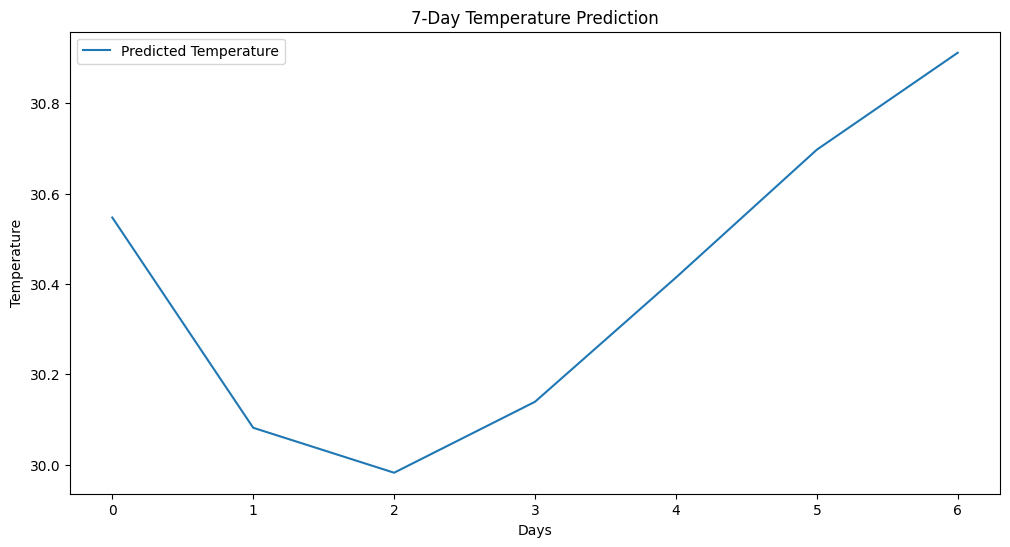

In [14]:
# Predict 7-Day Temperature

# Use the last sequence from the scaled data to start the prediction
last_sequence = scaled_data[-seq_length:]

# Initialize an empty list to store the predictions
predictions = []

# Predict the temperature for the next 7 days
for _ in range(7):
    # Reshape the last sequence to match the input shape of the model
    next_pred = model.predict(last_sequence.reshape(1, seq_length, 1))
    # Append the prediction to the list
    predictions.append(next_pred[0, 0])
    # Update the last sequence by removing the first element and adding the new prediction
    last_sequence = np.append(last_sequence[1:], next_pred, axis=0)

# Inverse transform the predictions to their original scale
predictions_original = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot the predicted temperature for the next 7 days
plt.figure(figsize=(12, 6))
plt.plot(predictions_original, label='Predicted Temperature')
plt.title('7-Day Temperature Prediction')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()